## Importando a biblioteca pandas

In [1]:
import pandas as pd

In [2]:
notas = pd.read_csv('ratings.csv')

In [3]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
notas.shape

(100836, 4)

In [5]:
notas.columns= ['usuarioId', 'filmeId', 'nota', 'momento']

In [6]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
notas.describe().round(2)

,usuarioId,filmeId,nota,momento
count,100836.00,100836.00,100836.00,1.008360e+05
mean,326.13,19435.30,3.50,1.205946e+09
std,182.62,35530.99,1.04,2.162610e+08
min,1.00,1.00,0.50,8.281246e+08
25%,177.00,1199.00,3.00,1.019124e+09
50%,325.00,2991.00,3.50,1.186087e+09
75%,477.00,8122.00,4.00,1.435994e+09
max,610.00,193609.00,5.00,1.537799e+09


In [8]:
notas['nota']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [9]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [10]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [11]:
notas['nota'].mean()

3.501556983616962

In [12]:
notas['nota'].std()

1.042529239060635

<AxesSubplot: ylabel='Frequency'>

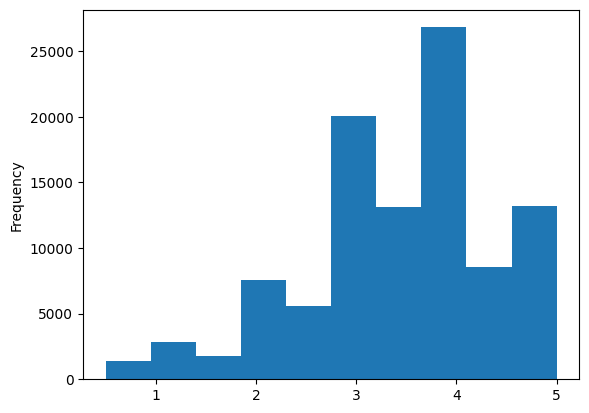

In [13]:
notas.nota.plot(kind='hist')

In [14]:
notas.nota.median()

3.5

In [15]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

In [16]:
import seaborn as sns

<AxesSubplot: >

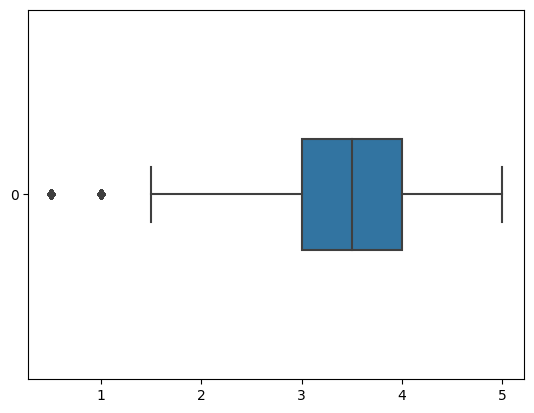

In [17]:
sns.boxplot(notas.nota, orient='h', width=0.3)

## Carregando o arquivo de filmes

In [22]:
filmes = pd.read_csv('movies.csv')
filmes.columns = ['filmeId', 'titulo', 'generos']
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [20]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [24]:
# Consultando todas as avaliações para o filme 1
notas.query('filmeId == 1')

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


In [25]:
# Para consultar apenas a nota para o filme 1
notas.query('filmeId == 1').nota
# Esta consulta retorna uma Series

0        4.0
516      4.0
874      4.5
1434     2.5
1667     4.5
        ... 
97364    2.5
98479    4.0
98666    2.5
99497    3.0
99534    5.0
Name: nota, Length: 215, dtype: float64

In [27]:
# Calculando a média das notas para o filme 1
notas.query('filmeId == 1').nota.mean().round(2)
# Esta consulta retorna uma Series

3.92

In [28]:
# Calculando a média das notas para o filme 2
notas.query('filmeId == 2').nota.mean().round(2)

3.43

In [30]:
# Agrupando as notas pelo Id do filme
notas.groupby('filmeId') # este método retorna um DataFrame.groupby do Pandas sobre o qual é possível realizar consultas


In [34]:
medias_por_filme = notas.groupby('filmeId').mean().round(2)['nota'] 
# aqui também poderia ser notas.groupby('filmeId').mean().round(2).nota